In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

01_13_LGHV_Modeling_afterFE.ipynb 에서의 모델링을 통해 나온 Feature Importance 이다.

📊 Feature Importance 비교 (2차)

| 순위 | 로지스틱 회귀 (랜덤 언더샘플링) | 랜덤 포레스트 (랜덤 언더샘플링) | XGBoost (랜덤 언더샘플링) | LightGBM (랜덤 언더샘플링) | CatBoost (랜덤 언더샘플링) | 로지스틱 회귀 (가중치) | LightGBM (가중치) |
|------|----------------------------------|----------------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1    | VOC_STOP_CANCEL_MONTH1_YN       | TOTAL_USED_DAYS                 | VOC_STOP_CANCEL_MONTH1_YN | MONTHS_REMAINING         | MONTHS_REMAINING         | VOC_STOP_CANCEL_MONTH1_YN | MONTHS_REMAINING         |
| 2    | PAID_CHNL_CNT_GRP               | MONTHS_REMAINING                | CH_LAST_DAYS_BF_GRP      | TOTAL_USED_DAYS          | VOC_STOP_CANCEL_MONTH1_YN | CH_LAST_DAYS_BF_GRP      | TOTAL_USED_DAYS          |
| 3    | CH_LAST_DAYS_BF_GRP             | CH_HH_AVG_MONTH1                | VOC_TOTAL_MONTH1_YN      | CH_HH_AVG_MONTH1         | CH_LAST_DAYS_BF_GRP      | PAID_CHNL_CNT_GRP        | CH_LAST_DAYS_BF_GRP      |
| 4    | TV_I_CNT                         | VOC_STOP_CANCEL_MONTH1_YN       | BUNDLE_YN               | CH_LAST_DAYS_BF_GRP      | TOTAL_USED_DAYS          | TV_I_CNT                 | AGE_GRP10                |
| 5    | VOC_TOTAL_MONTH1_YN              | AGE_GRP10                      | CH_LAST_DAYS_FE         | AGE_GRP10               | VOC_TOTAL_MONTH1_YN      | VOC_TOTAL_MONTH1_YN      | CH_HH_AVG_MONTH1         |
| 6    | BUNDLE_YN                        | VOC_TOTAL_MONTH1_YN            | MONTHS_REMAINING        | TV_I_CNT                | AGMT_END_SEG             | BUNDLE_YN                | TV_I_CNT                 |
| 7    | CH_LAST_DAYS_FE                  | INHOME_RATE                    | TOTAL_USED_DAYS         | INHOME_RATE             | BUNDLE_YN                | CH_LAST_DAYS_FE          | INHOME_RATE              |
| 8    | AGMT_KIND_NM                     | CH_LAST_DAYS_BF_GRP            | MEDIA_NM_GRP           | SCRB_PATH_NM_GRP       | INHOME_RATE              | AGMT_KIND_NM             | SCRB_PATH_NM_GRP         |
| 9    | INHOME_RATE                      | SCRB_PATH_NM_GRP               | PAID_CHNL_CNT_GRP      | BUNDLE_YN               | AGE_GRP10                | MONTHS_REMAINING         | BUNDLE_YN                |
| 10   | TOTAL_USED_DAYS                   | TV_I_CNT                      | AGMT_END_SEG          | VOC_TOTAL_MONTH1_YN    | CH_HH_AVG_MONTH1         | MEDIA_NM_GRP             | VOC_TOTAL_MONTH1_YN      |
| 11   | AGE_GRP10                        | PROD_NM_GRP                    | INHOME_RATE           | AGMT_END_SEG           | TV_I_CNT                 | AGE_GRP10                | PROD_NM_GRP              |
| 12   | MEDIA_NM_GRP                     | AGMT_KIND_NM                  | STB_RES_1M_YN         | SVC_USE_DAYS_GRP       | MEDIA_NM_GRP             | INHOME_RATE              | AGMT_END_SEG             |
| 13   | MONTHS_REMAINING                 | AGMT_END_SEG                  | AGE_GRP10             | PROD_NM_GRP            | AGMT_END_SEG_FE          | TOTAL_USED_DAYS          | SVC_USE_DAYS_GRP         |
| 14   | AGMT_END_SEG_FE                  | SVC_USE_DAYS_GRP              | AGMT_KIND_NM          | AGMT_KIND_NM           | SCRB_PATH_NM_GRP         | AGMT_END_SEG_FE          | VOC_STOP_CANCEL_MONTH1_YN |
| 15   | AGMT_END_SEG                      | BUNDLE_YN                     | TV_I_CNT              | MEDIA_NM_GRP           | AGMT_KIND_NM             | AGMT_END_SEG             | MEDIA_NM_GRP             |
| 16   | SCRB_PATH_NM_GRP                  | CH_LAST_DAYS_FE               | PROD_NM_GRP           | VOC_STOP_CANCEL_MONTH1_YN | PROD_NM_GRP            | SCRB_PATH_NM_GRP         | AGMT_KIND_NM             |
| 17   | STB_RES_1M_YN                     | STB_RES_1M_YN                 | SCRB_PATH_NM_GRP      | PAID_CHNL_CNT_GRP      | CH_LAST_DAYS_FE          | STB_RES_1M_YN            | PAID_CHNL_CNT_GRP        |
| 18   | KIDS_USE_YN                       | AGMT_END_SEG_FE               | CH_HH_AVG_MONTH1      | STB_RES_1M_YN          | SVC_USE_DAYS_GRP         | KIDS_USE_YN              | STB_RES_1M_YN            |
| 19   | CONTENT_USE_YN                    | MEDIA_NM_GRP                  | SVC_USE_DAYS_GRP      | CONTENT_USE_YN         | STB_RES_1M_YN            | PROD_NM_GRP              | CONTENT_USE_YN           |
| 20   | CH_HH_AVG_MONTH1                  | KIDS_USE_YN                   | CONTENT_USE_YN        | AGMT_END_SEG_FE        | PAID_CHNL_CNT_GRP        | CH_HH_AVG_MONTH1         | AGMT_END_SEG_FE          |
| 21   | PROD_NM_GRP                       | PAID_CHNL_CNT_GRP             | KIDS_USE_YN           | KIDS_USE_YN            | CONTENT_USE_YN           | CONTENT_USE_YN           | KIDS_USE_YN              |
| 22   | SVC_USE_DAYS_GRP                  | CONTENT_USE_YN                | AGMT_END_SEG_FE       | CH_LAST_DAYS_FE        | KIDS_USE_YN              | SVC_USE_DAYS_GRP         | CH_LAST_DAYS_FE          |


### 🎀 Feature Selection

#### 📌 Feature Selection 과정 및 2차 Feature 선정

이번 Feature Selection 과정에서는 **7가지 모델(로지스틱 회귀, 랜덤 포레스트, XGBoost, LightGBM, CatBoost 등)의 Feature Importance 비교 결과를 기반**으로 **가장 의미 있는 피처들을 2차적으로 선정**하는 작업을 진행했음.

1️. 모델별 Feature Importance 비교
- 각 모델의 Feature Importance를 분석하여 **공통적으로 중요하게 나타나는 피처**를 우선적으로 고려함
- 특히, **다수의 모델에서 상위 10~15위 내에 포함되는 피처**는 중요한 변수로 판단하여 유지

2️. 해석 가능성과 비즈니스적 의미 고려
- Feature Importance가 높더라도 **비즈니스적으로 의미가 없는 변수는 제외**하였습니다.
- 예를 들어, **총 사용일수(TOTAL_USED_DAYS)**나 **집돌이 지수(INHOME_RATE)** 같은 변수는  
  고객의 서비스 이용 패턴과 직접적인 연관이 있어 유지!!

3️. 중요도가 낮거나, 중복될 가능성이 높은 변수 제거
- **모든 모델에서 하위권(15위 이하)에 위치하는 변수들은 제거**
- **의미가 유사한 변수 중 하나만 선택**
  - 예: `CH_LAST_DAYS_BF_GRP` vs. `CH_LAST_DAYS_FE` → 더 중요한 `CH_LAST_DAYS_BF_GRP`만 유지.

4️. 2차 선정 피처 리스트 확정
- 다양한 모델에서 높은 중요도를 보이며, 해지 예측과 관련성이 높은 **16개의 피처를 2차적으로 선정**
- **불필요한 피처를 제거하여 모델의 복잡도를 줄이고, 성능을 최적화**하는 것을 목표로 하였음!

#### ✅ 2차 선정된 Features

| Feature |
|---------|
| `SCRB_PATH_NM_GRP` |
| `INHOME_RATE` |
| `TOTAL_USED_DAYS` |
| `CH_LAST_DAYS_BF_GRP` |
| `STB_RES_1M_YN` |
| `AGMT_KIND_NM` |
| `BUNDLE_YN` |
| `TV_I_CNT` |
| `AGMT_END_SEG` |
| `AGE_GRP10` |
| `VOC_STOP_CANCEL_MONTH1_YN` |
| `CH_HH_AVG_MONTH1` |
| `MONTHS_REMAINING` |
| `PROD_NM_GRP` |
| `MEDIA_NM_GRP` |
| `VOC_TOTAL_MONTH1_YN` |

해당 Feature들을 가지고 **모델링을 한 번 더 진행!!**


---

In [2]:
df_real = pd.read_csv("data/full_data/TPS_cancel_data_FeatureEngineering_end.csv")

In [3]:
# 해당 컬럼들 들고오기

df = df_real.filter(items=['sha2_hash','MEDIA_NM_GRP','PROD_NM_GRP','AGMT_KIND_NM','STB_RES_1M_YN',
                 'SCRB_PATH_NM_GRP','INHOME_RATE','AGMT_END_SEG','TOTAL_USED_DAYS','BUNDLE_YN',
                 'TV_I_CNT','CH_LAST_DAYS_BF_GRP','VOC_TOTAL_MONTH1_YN','VOC_STOP_CANCEL_MONTH1_YN','AGE_GRP10',
                 'CH_HH_AVG_MONTH1','MONTHS_REMAINING','p_mt','churn'])

In [7]:
df.columns

Index(['sha2_hash', 'MEDIA_NM_GRP', 'PROD_NM_GRP', 'AGMT_KIND_NM',
       'STB_RES_1M_YN', 'SCRB_PATH_NM_GRP', 'INHOME_RATE', 'AGMT_END_SEG',
       'TOTAL_USED_DAYS', 'BUNDLE_YN', 'TV_I_CNT', 'CH_LAST_DAYS_BF_GRP',
       'VOC_TOTAL_MONTH1_YN', 'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10',
       'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING', 'p_mt', 'churn'],
      dtype='object')

---

### 랜덤 언더 샘플링 데이터로 진행
1. 로지스틱
2. 랜덤 포레스트
3. XGB
4. LGBM
5. Cat

#### 1. LR 랜덤 언더 샘플링 데이터

In [4]:
# 2월 ~ 9월 train
# 6월 val
# 11월 test
train = df[df['p_mt'].isin([2,3,4,5,7,8,9])]
val = df[df['p_mt'] == 6]
test = df[df['p_mt'] == 11]

In [5]:
train

,sha2_hash,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,10.00,약정만료전 12개월이상,733,Y,3.00,3개월내없음,N,N,60대,0.00,13,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,Y,I/B,0.00,약정만료전 9~12개월,764,Y,3.00,일주일내,Y,N,60대,6.72,12,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,10.00,약정만료전 9~12개월,794,Y,3.00,3주일전,N,N,60대,9.86,11,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,10.00,약정만료전 9~12개월,825,Y,3.00,4주일전,N,N,60대,5.95,10,5,N
5,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,0.00,약정만료전 6~9개월,886,Y,3.00,일주일내,Y,N,60대,2.93,8,7,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483370,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2215,N,1.00,일주일내,N,N,50대,2.42,-36,4,N
21483371,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2246,N,1.00,일주일내,N,N,50대,3.67,-37,5,N
21483373,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2307,N,1.00,일주일내,N,N,50대,4.10,-39,7,N
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2338,N,1.00,일주일내,N,N,50대,2.03,-40,8,N


In [6]:
# INHOME_RATE 컬럼은 object로

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object
object


In [8]:
train = train.drop(columns=['sha2_hash','p_mt'])
val = val.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

In [9]:
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [10]:
print("Before RU:")
print(y.value_counts())

print("\nAfter RU:")
print(pd.Series(y_resampled).value_counts())

Before RU:
churn
N    13599467
Y       92454
Name: count, dtype: int64

After RU:
churn
N    92454
Y    92454
Name: count, dtype: int64


In [11]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='churn')

resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [12]:
train = resampled_data

In [13]:
categorical_cols = train.select_dtypes(include=['object']).columns

# Train에는 없고 Validation에만 있는 값 찾기
unseen_values = {}

for col in categorical_cols:
    train_unique = set(train[col].unique())
    val_unique = set(val[col].unique())

    unseen = val_unique - train_unique
    if unseen:
        unseen_values[col] = unseen

# 결과 출력
print(unseen_values)

{'PROD_NM_GRP': {'기타'}, 'INHOME_RATE': {'100.0'}}


In [14]:
val = val[val['PROD_NM_GRP'] != '기타'].reset_index(drop=True)
test = test[test['PROD_NM_GRP'] != '기타'].reset_index(drop=True)

val = val[val['INHOME_RATE'] != '100.0'].reset_index(drop=True)
test = test[test['INHOME_RATE'] != '100.0'].reset_index(drop=True)


In [15]:
# 레이블 인코딩 진행!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# 레이블 인코딩 수행
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("레이블 인코딩 끝")

레이블 인코딩 끝


In [16]:
display(train)
display(val)
display(test)

,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,0,0,0,0,0,0,8,2926,0,2.00,3,0,0,5,0.01,-23,0
1,0,3,0,0,1,0,7,3631,0,2.00,1,0,0,5,0.00,10,0
2,0,3,5,0,0,2,1,1728,1,3.00,4,0,0,4,6.11,16,0
3,1,0,2,0,4,1,6,1825,0,2.00,4,1,0,3,0.91,8,0
4,1,4,5,0,1,3,1,1610,1,3.00,4,0,0,3,6.28,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184903,0,4,5,1,4,0,1,3712,1,2.00,4,0,0,5,1.90,30,1
184904,0,3,0,1,1,0,1,501,1,2.00,1,0,0,2,0.00,20,1
184905,1,4,0,1,9,0,1,11,1,2.00,4,1,0,4,3.49,36,1
184906,0,0,0,0,9,0,1,231,0,1.00,5,0,0,4,0.62,29,1


,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,0,3,0,0,0,0,6,855,1,3.00,4,0,0,5,4.03,9,0
1,0,4,5,0,0,6,7,4249,1,2.00,4,0,0,4,18.08,12,0
2,0,0,5,0,4,1,1,2488,1,6.00,4,0,0,5,1.09,25,0
3,0,3,0,0,4,1,11,1836,0,3.00,4,0,0,5,1.32,-5,0
4,0,4,0,0,9,0,8,3826,1,4.00,4,0,0,4,1.27,-46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955096,0,0,5,0,9,0,8,3446,0,2.00,0,0,0,4,1.72,-43,0
1955097,0,3,0,0,1,1,8,2128,1,3.00,4,0,0,3,2.12,-34,0
1955098,0,3,2,0,4,0,8,3805,0,2.00,4,0,0,2,0.73,-104,0
1955099,1,0,5,0,0,2,1,1399,1,2.00,4,1,0,4,4.37,24,0


,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,0,3,5,0,0,2,1,1008,1,3.00,4,0,0,5,6.23,33,0
1,0,4,5,0,0,7,6,4402,1,2.00,4,0,0,4,15.37,7,0
2,0,0,5,0,4,1,1,2641,1,6.00,4,0,0,5,1.47,20,0
3,0,3,0,0,4,1,13,1989,0,3.00,4,0,0,5,2.16,-10,0
4,0,4,0,0,9,0,8,3979,1,4.00,4,1,0,4,1.64,-51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945580,0,0,5,0,9,0,8,3599,0,2.00,1,0,0,4,0.00,-48,0
1945581,0,3,0,0,1,1,8,2281,1,3.00,4,0,0,3,1.81,-39,0
1945582,0,3,2,0,4,0,8,3958,0,2.00,4,0,0,2,1.69,-109,0
1945583,1,0,5,0,0,2,1,1552,1,2.00,4,0,0,4,3.39,19,0


In [17]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# 내가 정한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1','MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [18]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
#
model = LogisticRegression(solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Validation Accuracy: 0.77

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.77      0.87   1941849
           1       0.02      0.67      0.04     13252

    accuracy                           0.77   1955101
   macro avg       0.51      0.72      0.45   1955101
weighted avg       0.99      0.77      0.86   1955101


Confusion Matrix (Validation):
[[1495488  446361]
 [   4391    8861]]


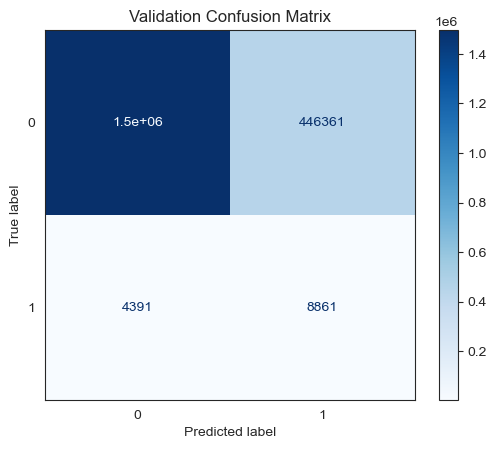

Validation AUC-ROC: 0.80


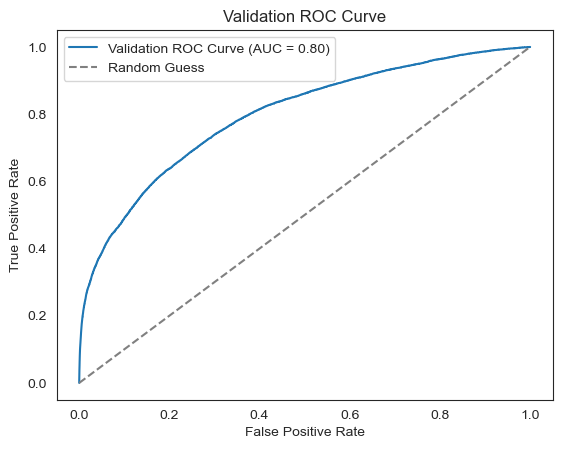

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 검증 데이터
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# 검증 데이터 (Validation) 평가
# -----------------------------------------------------------
# 검증 데이터(val) 예측
val_predictions = model.predict(X_val)

# 정확도 확인
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, val_predictions))
disp_val = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, val_predictions), display_labels=model.classes_)

# Confusion Matrix
plt.figure()
disp_val.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Validation Confusion Matrix")
plt.show()

# AUC-ROC 계산 및 시각화
val_probabilities = model.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 확률
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

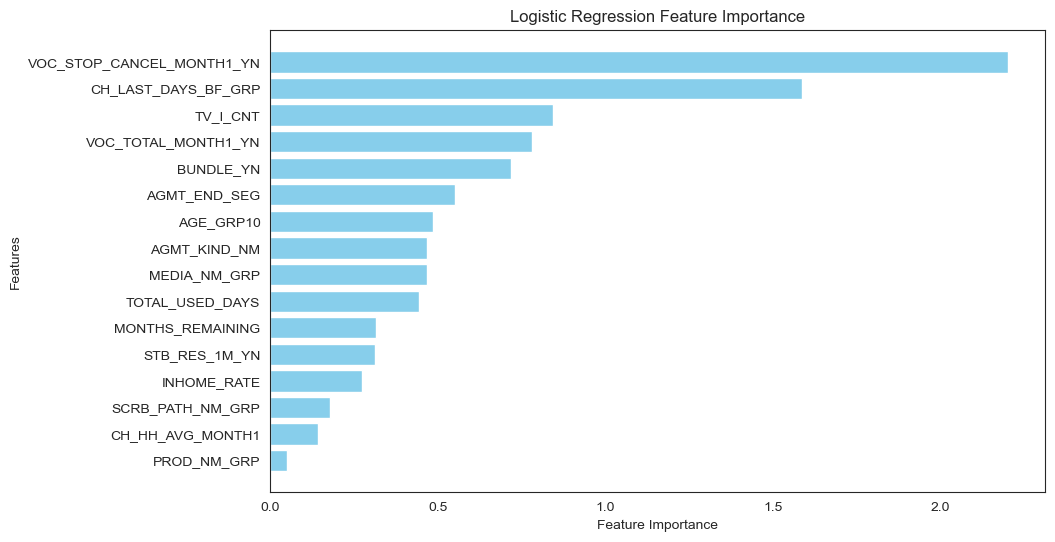

✅ Feature Importance
1. VOC_STOP_CANCEL_MONTH1_YN
2. CH_LAST_DAYS_BF_GRP
3. TV_I_CNT
4. VOC_TOTAL_MONTH1_YN
5. BUNDLE_YN
6. AGMT_END_SEG
7. AGE_GRP10
8. AGMT_KIND_NM
9. MEDIA_NM_GRP
10. TOTAL_USED_DAYS
11. MONTHS_REMAINING
12. STB_RES_1M_YN
13. INHOME_RATE
14. SCRB_PATH_NM_GRP
15. CH_HH_AVG_MONTH1
16. PROD_NM_GRP


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance 추출 (절댓값 사용)
feature_importance = np.abs(model.coef_[0])

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print("✅ Feature Importance")
for rank, feature in enumerate(feature_importance_df['Feature'], 1):
    print(f"{rank}. {feature}")

---

#### 2. 랜덤 포레스트 랜덤 언더 샘플링

In [21]:
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 랜덤 포레스트 모델
rf_model = RandomForestClassifier(
    n_estimators=100,  # 트리 개수
    random_state=42
)

# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Validation Accuracy: 0.79

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1941849
           1       0.02      0.70      0.04     13252

    accuracy                           0.79   1955101
   macro avg       0.51      0.75      0.46   1955101
weighted avg       0.99      0.79      0.88   1955101


Confusion Matrix (Validation):
[[1543204  398645]
 [   4019    9233]]


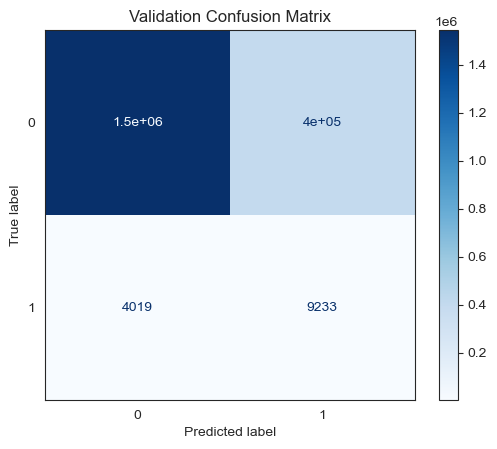

Validation AUC-ROC: 0.82


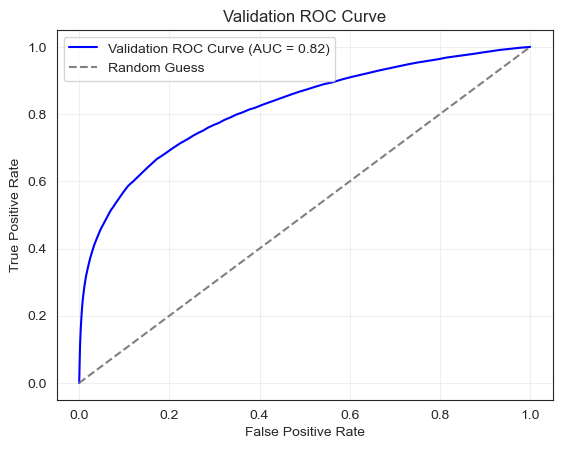

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 검증 데이터
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# 검증 데이터 (Validation) 평가
# -----------------------------------------------------------
# 검증 데이터(val) 예측
val_predictions = rf_model.predict(X_val)

# 정확도 확인
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC 계산 및 시각화
# -----------------------------------------------------------
val_probabilities = rf_model.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 확률
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve 계산
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve 시각화
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

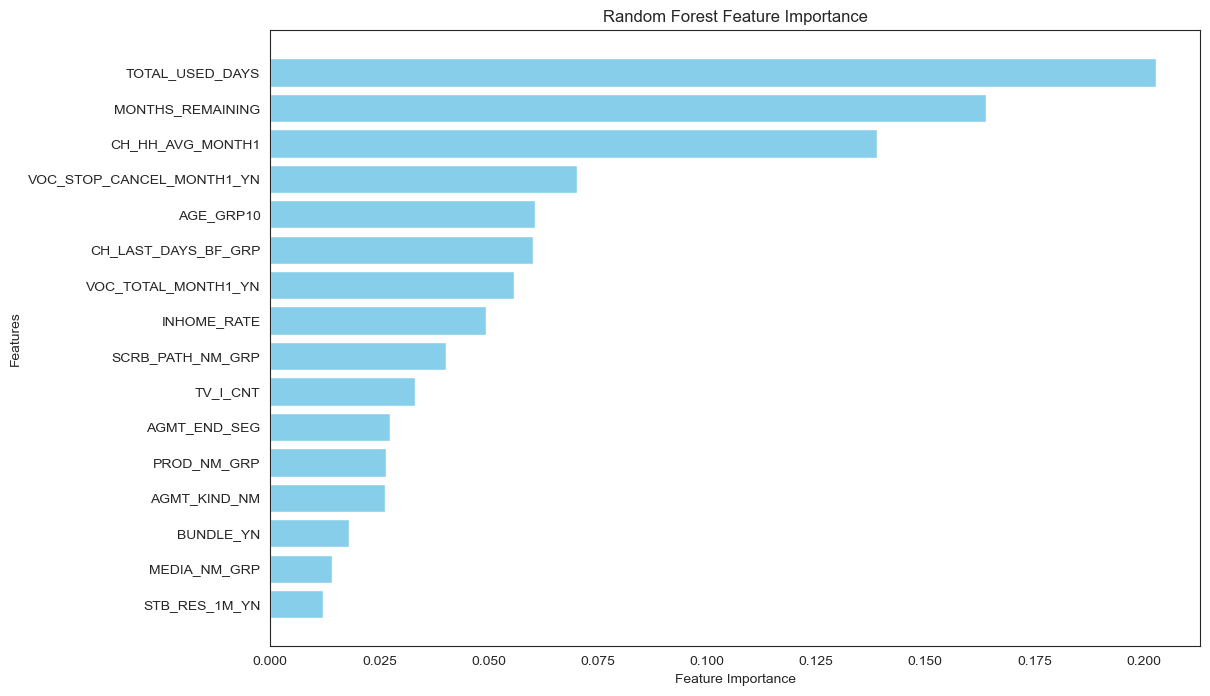

✅ Feature Importance
1. TOTAL_USED_DAYS
2. MONTHS_REMAINING
3. CH_HH_AVG_MONTH1
4. VOC_STOP_CANCEL_MONTH1_YN
5. AGE_GRP10
6. CH_LAST_DAYS_BF_GRP
7. VOC_TOTAL_MONTH1_YN
8. INHOME_RATE
9. SCRB_PATH_NM_GRP
10. TV_I_CNT
11. AGMT_END_SEG
12. PROD_NM_GRP
13. AGMT_KIND_NM
14. BUNDLE_YN
15. MEDIA_NM_GRP
16. STB_RES_1M_YN


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print("✅ Feature Importance")
for rank, feature in enumerate(feature_importance_df['Feature'], 1):
    print(f"{rank}. {feature}")

---

#### 3. XGB 랜덤 언더 샘플링

In [24]:
from xgboost import XGBClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# XGBoost 모델 생성
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Validation Accuracy: 0.81

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1941849
           1       0.02      0.71      0.05     13252

    accuracy                           0.81   1955101
   macro avg       0.51      0.76      0.47   1955101
weighted avg       0.99      0.81      0.89   1955101


Confusion Matrix (Validation):
[[1571074  370775]
 [   3857    9395]]


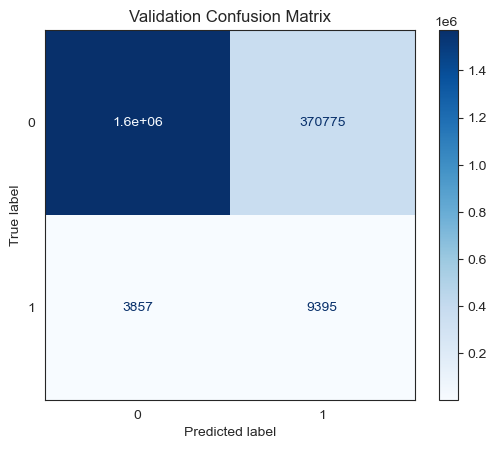

Validation AUC-ROC: 0.84


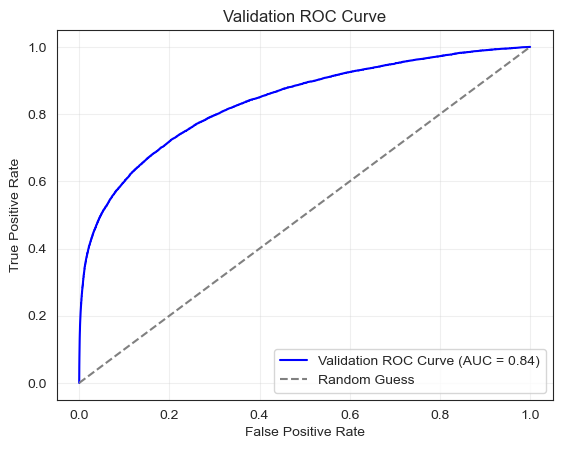

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 검증 데이터
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# 검증 데이터 (Validation) 평가
# -----------------------------------------------------------
# 검증 데이터(val) 예측
val_predictions = xgb_model.predict(X_val)

# 정확도 확인
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC 계산 및 시각화
# -----------------------------------------------------------
val_probabilities = xgb_model.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 확률
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve 계산
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve 시각화
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

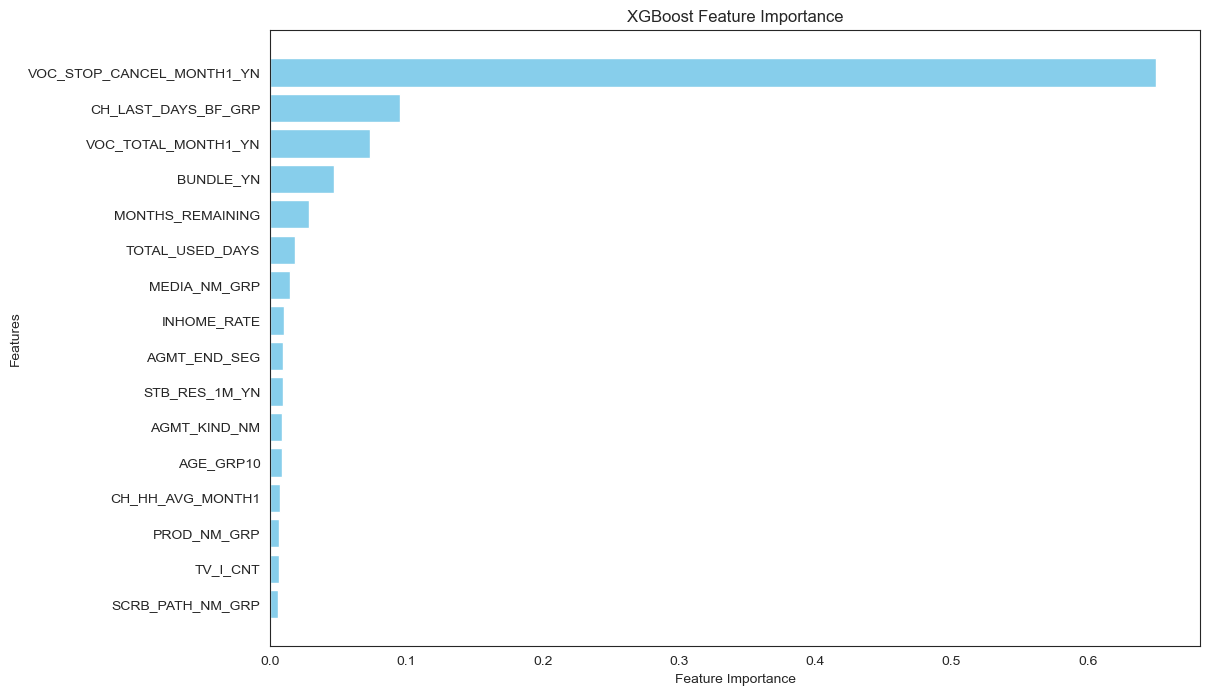

✅ Feature Importance
1. VOC_STOP_CANCEL_MONTH1_YN
2. CH_LAST_DAYS_BF_GRP
3. VOC_TOTAL_MONTH1_YN
4. BUNDLE_YN
5. MONTHS_REMAINING
6. TOTAL_USED_DAYS
7. MEDIA_NM_GRP
8. INHOME_RATE
9. AGMT_END_SEG
10. STB_RES_1M_YN
11. AGMT_KIND_NM
12. AGE_GRP10
13. CH_HH_AVG_MONTH1
14. PROD_NM_GRP
15. TV_I_CNT
16. SCRB_PATH_NM_GRP


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance 추출
feature_importance = xgb_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print("✅ Feature Importance")
for rank, feature in enumerate(feature_importance_df['Feature'], 1):
    print(f"{rank}. {feature}")

---

#### 4. LGBM 랜덤 언더 샘플링

In [27]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Validation Accuracy: 0.81

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1941849
           1       0.02      0.71      0.05     13252

    accuracy                           0.81   1955101
   macro avg       0.51      0.76      0.47   1955101
weighted avg       0.99      0.81      0.89   1955101


Confusion Matrix (Validation):
[[1571746  370103]
 [   3843    9409]]


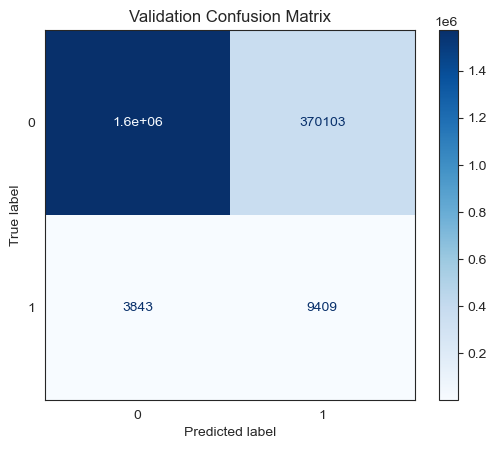

Validation AUC-ROC: 0.84


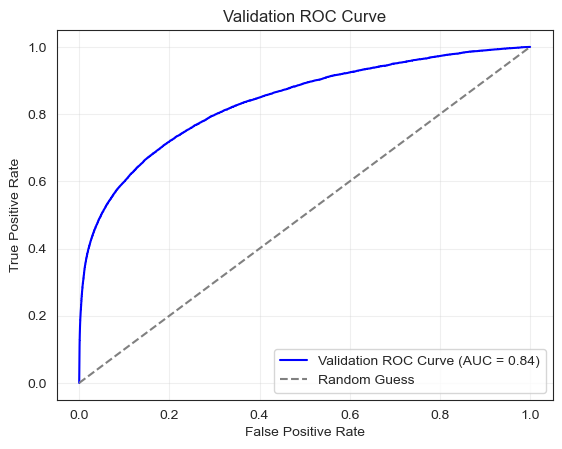

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 검증 데이터
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# 검증 데이터 (Validation) 평가
# -----------------------------------------------------------
# 검증 데이터(val) 예측
val_predictions = lgbm_model.predict(X_val)

# 정확도 확인
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgbm_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC 계산 및 시각화
# -----------------------------------------------------------
val_probabilities = lgbm_model.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 확률
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve 계산
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve 시각화
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

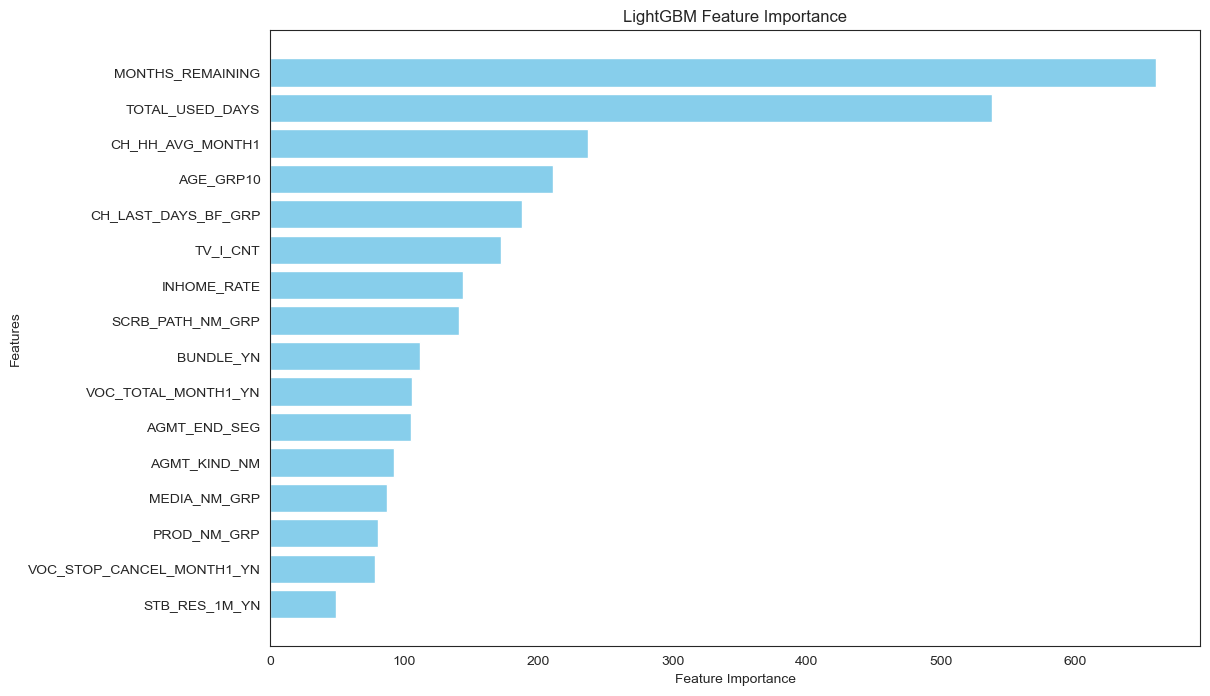

✅ Feature Importance
1. MONTHS_REMAINING
2. TOTAL_USED_DAYS
3. CH_HH_AVG_MONTH1
4. AGE_GRP10
5. CH_LAST_DAYS_BF_GRP
6. TV_I_CNT
7. INHOME_RATE
8. SCRB_PATH_NM_GRP
9. BUNDLE_YN
10. VOC_TOTAL_MONTH1_YN
11. AGMT_END_SEG
12. AGMT_KIND_NM
13. MEDIA_NM_GRP
14. PROD_NM_GRP
15. VOC_STOP_CANCEL_MONTH1_YN
16. STB_RES_1M_YN


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print("✅ Feature Importance")
for rank, feature in enumerate(feature_importance_df['Feature'], 1):
    print(f"{rank}. {feature}")

---

#### 5. CatBoost 랜덤 언더 샘플링

In [30]:
from catboost import CatBoostClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 기본값을 사용한 CatBoost 모델 생성
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

# 모델 학습
cat_model.fit(X_train, y_train)

0:	learn: 0.6795107	total: 184ms	remaining: 3m 4s
1:	learn: 0.6668987	total: 219ms	remaining: 1m 49s
2:	learn: 0.6552808	total: 257ms	remaining: 1m 25s
3:	learn: 0.6448682	total: 281ms	remaining: 1m 10s
4:	learn: 0.6352823	total: 315ms	remaining: 1m 2s
5:	learn: 0.6262131	total: 347ms	remaining: 57.5s
6:	learn: 0.6178985	total: 375ms	remaining: 53.2s
7:	learn: 0.6101772	total: 410ms	remaining: 50.8s
8:	learn: 0.6032946	total: 452ms	remaining: 49.8s
9:	learn: 0.5968573	total: 513ms	remaining: 50.8s
10:	learn: 0.5909312	total: 541ms	remaining: 48.7s
11:	learn: 0.5858272	total: 572ms	remaining: 47.1s
12:	learn: 0.5806014	total: 592ms	remaining: 45s
13:	learn: 0.5759615	total: 616ms	remaining: 43.4s
14:	learn: 0.5715940	total: 640ms	remaining: 42s
15:	learn: 0.5674781	total: 665ms	remaining: 40.9s
16:	learn: 0.5635098	total: 685ms	remaining: 39.6s
17:	learn: 0.5601554	total: 704ms	remaining: 38.4s
18:	learn: 0.5568096	total: 725ms	remaining: 37.4s
19:	learn: 0.5537547	total: 745ms	remainin

Validation Accuracy: 0.81

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1941849
           1       0.02      0.71      0.05     13252

    accuracy                           0.81   1955101
   macro avg       0.51      0.76      0.47   1955101
weighted avg       0.99      0.81      0.89   1955101


Confusion Matrix (Validation):
[[1567874  373975]
 [   3803    9449]]


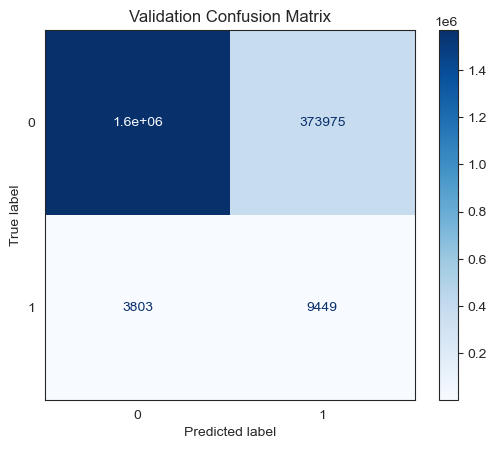

Validation AUC-ROC: 0.84


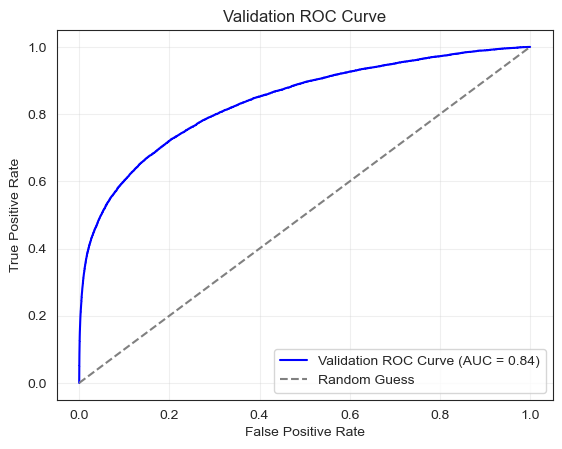

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 검증 데이터
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# 검증 데이터 (Validation) 평가
# -----------------------------------------------------------
# 검증 데이터(val) 예측
val_predictions = cat_model.predict(X_val)

# 정확도 확인
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cat_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC 계산 및 시각화
# -----------------------------------------------------------
val_probabilities = cat_model.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 확률
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve 계산
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve 시각화
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

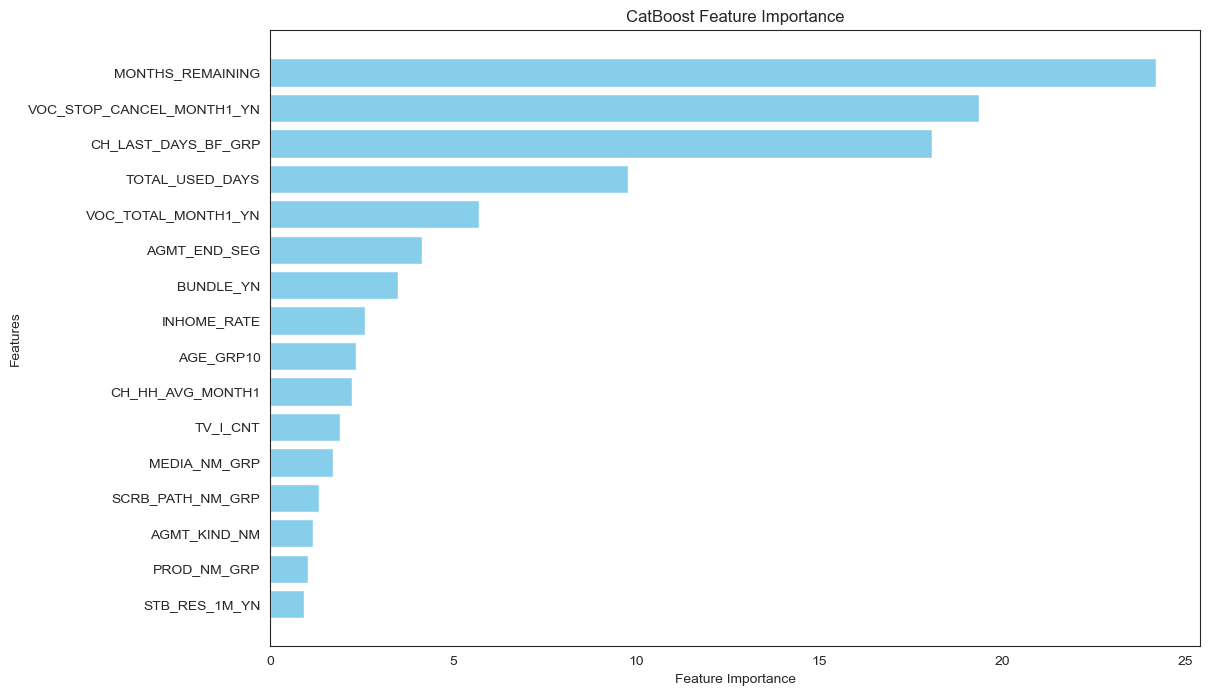

✅ Feature Importance
1. MONTHS_REMAINING
2. VOC_STOP_CANCEL_MONTH1_YN
3. CH_LAST_DAYS_BF_GRP
4. TOTAL_USED_DAYS
5. VOC_TOTAL_MONTH1_YN
6. AGMT_END_SEG
7. BUNDLE_YN
8. INHOME_RATE
9. AGE_GRP10
10. CH_HH_AVG_MONTH1
11. TV_I_CNT
12. MEDIA_NM_GRP
13. SCRB_PATH_NM_GRP
14. AGMT_KIND_NM
15. PROD_NM_GRP
16. STB_RES_1M_YN


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance 추출
feature_importance = cat_model.get_feature_importance()

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print("✅ Feature Importance")
for rank, feature in enumerate(feature_importance_df['Feature'], 1):
    print(f"{rank}. {feature}")

---

### 가중치로 진행
1. 로지스틱
2. LGBM

#### 1. LR 가중치

In [33]:
# 2월 ~ 9월 train
# 6월 val
# 11월 test
train = df[df['p_mt'].isin([2,3,4,5,7,8,9])]
val = df[df['p_mt'] == 6]
test = df[df['p_mt'] == 11]

In [34]:
train

,sha2_hash,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,10.00,약정만료전 12개월이상,733,Y,3.00,3개월내없음,N,N,60대,0.00,13,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,Y,I/B,0.00,약정만료전 9~12개월,764,Y,3.00,일주일내,Y,N,60대,6.72,12,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,10.00,약정만료전 9~12개월,794,Y,3.00,3주일전,N,N,60대,9.86,11,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,10.00,약정만료전 9~12개월,825,Y,3.00,4주일전,N,N,60대,5.95,10,5,N
5,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,HD,이코노미,신규,N,I/B,0.00,약정만료전 6~9개월,886,Y,3.00,일주일내,Y,N,60대,2.93,8,7,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483370,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2215,N,1.00,일주일내,N,N,50대,2.42,-36,4,N
21483371,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2246,N,1.00,일주일내,N,N,50대,3.67,-37,5,N
21483373,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2307,N,1.00,일주일내,N,N,50대,4.10,-39,7,N
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,HD,베이직,신규,N,현장경로,10.00,약정만료후 12개월이상,2338,N,1.00,일주일내,N,N,50대,2.03,-40,8,N


In [35]:
# INHOME_RATE 컬럼은 object로

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object
object


In [36]:
train = train.drop(columns=['sha2_hash','p_mt'])
val = val.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

In [37]:
# 레이블 인코딩 진행!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# 레이블 인코딩 수행
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("레이블 인코딩 끝")

레이블 인코딩 끝


In [38]:
display(train)
display(val)
display(test)

,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
0,0,4,0,0,0,1,1,733,1,3.00,1,0,0,5,0.00,13,0
1,0,4,0,1,0,0,7,764,1,3.00,4,1,0,5,6.72,12,0
2,0,4,0,0,0,1,7,794,1,3.00,2,0,0,5,9.86,11,0
3,0,4,0,0,0,1,7,825,1,3.00,3,0,0,5,5.95,10,0
5,0,4,0,0,0,0,6,886,1,3.00,4,1,0,5,2.93,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483370,0,1,0,0,9,1,8,2215,0,1.00,4,0,0,4,2.42,-36,0
21483371,0,1,0,0,9,1,8,2246,0,1.00,4,0,0,4,3.67,-37,0
21483373,0,1,0,0,9,1,8,2307,0,1.00,4,0,0,4,4.10,-39,0
21483374,0,1,0,0,9,1,8,2338,0,1.00,4,0,0,4,2.03,-40,0


,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
4,0,4,0,0,0,0,6,855,1,3.00,4,0,0,5,4.03,9,0
15,0,5,5,0,0,7,7,4249,1,2.00,4,0,0,4,18.08,12,0
26,0,1,5,0,4,1,1,2488,1,6.00,4,0,0,5,1.09,25,0
37,0,4,0,0,4,1,11,1836,0,3.00,4,0,0,5,1.32,-5,0
48,0,5,0,0,9,0,8,3826,1,4.00,4,0,0,4,1.27,-46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483328,0,1,5,0,9,0,8,3446,0,2.00,0,0,0,4,1.72,-43,0
21483339,0,4,0,0,1,1,8,2128,1,3.00,4,0,0,3,2.12,-34,0
21483350,0,4,2,0,4,0,8,3805,0,2.00,4,0,0,2,0.73,-104,0
21483361,1,1,5,0,0,3,1,1399,1,2.00,4,1,0,4,4.37,24,0


,MEDIA_NM_GRP,PROD_NM_GRP,AGMT_KIND_NM,STB_RES_1M_YN,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,CH_HH_AVG_MONTH1,MONTHS_REMAINING,churn
9,0,4,5,0,0,3,1,1008,1,3.00,4,0,0,5,6.23,33,0
20,0,5,5,0,0,8,6,4402,1,2.00,4,0,0,4,15.37,7,0
31,0,1,5,0,4,1,1,2641,1,6.00,4,0,0,5,1.47,20,0
42,0,4,0,0,4,1,13,1989,0,3.00,4,0,0,5,2.16,-10,0
53,0,5,0,0,9,0,8,3979,1,4.00,4,1,0,4,1.64,-51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483333,0,1,5,0,9,0,8,3599,0,2.00,1,0,0,4,0.00,-48,0
21483344,0,4,0,0,1,1,8,2281,1,3.00,4,0,0,3,1.81,-39,0
21483355,0,4,2,0,4,0,8,3958,0,2.00,4,0,0,2,1.69,-109,0
21483366,1,1,5,0,0,3,1,1552,1,2.00,4,0,0,4,3.39,19,0


In [39]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# 내가 정한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1','MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [40]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Validation Accuracy: 0.77

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.77      0.87   1941863
           1       0.02      0.67      0.04     13252

    accuracy                           0.77   1955115
   macro avg       0.51      0.72      0.45   1955115
weighted avg       0.99      0.77      0.86   1955115


Confusion Matrix (Validation):
[[1494749  447114]
 [   4389    8863]]


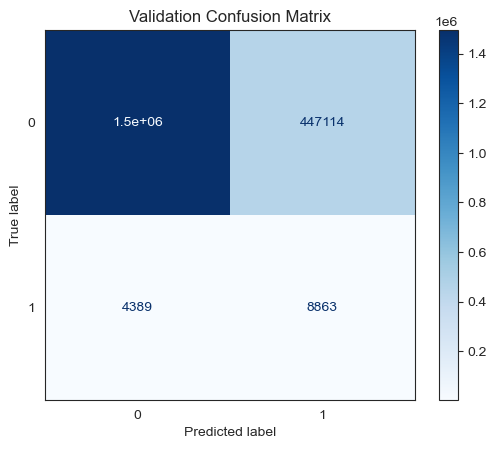

Validation AUC-ROC: 0.80


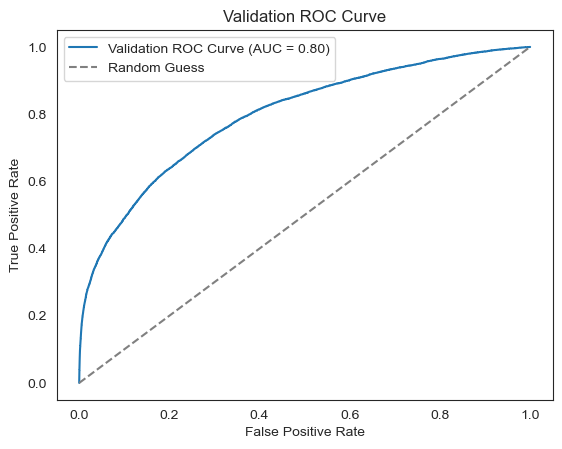

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 검증 데이터
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# 검증 데이터 (Validation) 평가
# -----------------------------------------------------------
# 검증 데이터(val) 예측
val_predictions = model.predict(X_val)

# 정확도 확인
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, val_predictions))
disp_val = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, val_predictions), display_labels=model.classes_)

# Confusion Matrix
plt.figure()
disp_val.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Validation Confusion Matrix")
plt.show()

# AUC-ROC 계산 및 시각화
val_probabilities = model.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 확률
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

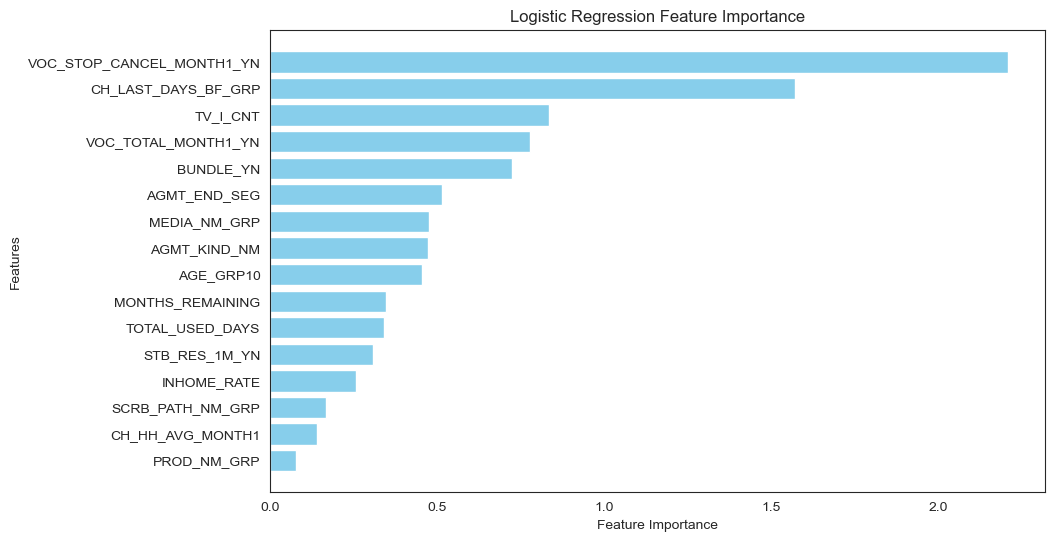

✅ Feature Importance
1. VOC_STOP_CANCEL_MONTH1_YN
2. CH_LAST_DAYS_BF_GRP
3. TV_I_CNT
4. VOC_TOTAL_MONTH1_YN
5. BUNDLE_YN
6. AGMT_END_SEG
7. MEDIA_NM_GRP
8. AGMT_KIND_NM
9. AGE_GRP10
10. MONTHS_REMAINING
11. TOTAL_USED_DAYS
12. STB_RES_1M_YN
13. INHOME_RATE
14. SCRB_PATH_NM_GRP
15. CH_HH_AVG_MONTH1
16. PROD_NM_GRP


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print("✅ Feature Importance")
for rank, feature in enumerate(feature_importance_df['Feature'], 1):
    print(f"{rank}. {feature}")

---

#### 2. LGBM 가중치

In [43]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',  # 클래스 가중치 적용
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Validation Accuracy: 0.81

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1941863
           1       0.02      0.71      0.05     13252

    accuracy                           0.81   1955115
   macro avg       0.51      0.76      0.47   1955115
weighted avg       0.99      0.81      0.89   1955115


Confusion Matrix (Validation):
[[1574504  367359]
 [   3880    9372]]


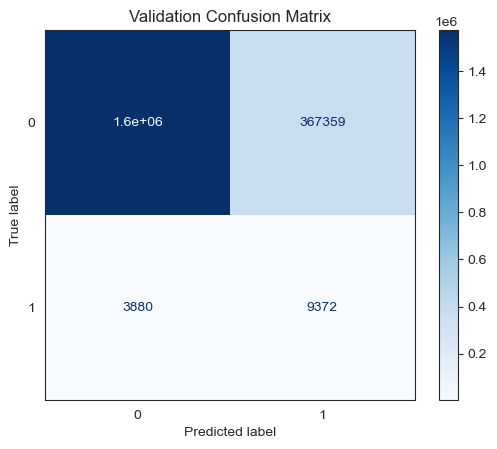

Validation AUC-ROC: 0.84


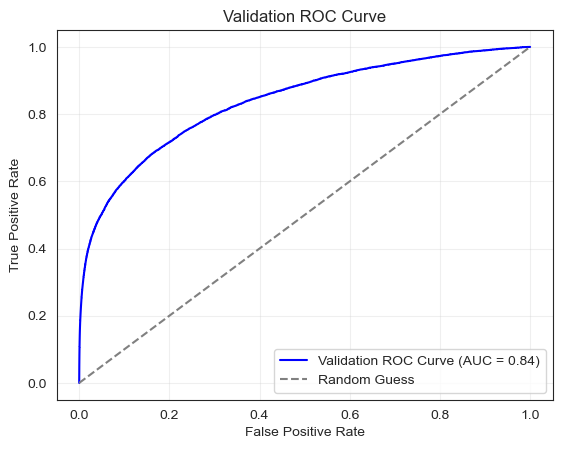

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 검증 데이터
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# 검증 데이터 (Validation) 평가
# -----------------------------------------------------------
# 검증 데이터(val) 예측
val_predictions = lgbm_model.predict(X_val)

# 정확도 확인
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgbm_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC 계산 및 시각화
# -----------------------------------------------------------
val_probabilities = lgbm_model.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 확률
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve 계산
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve 시각화
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

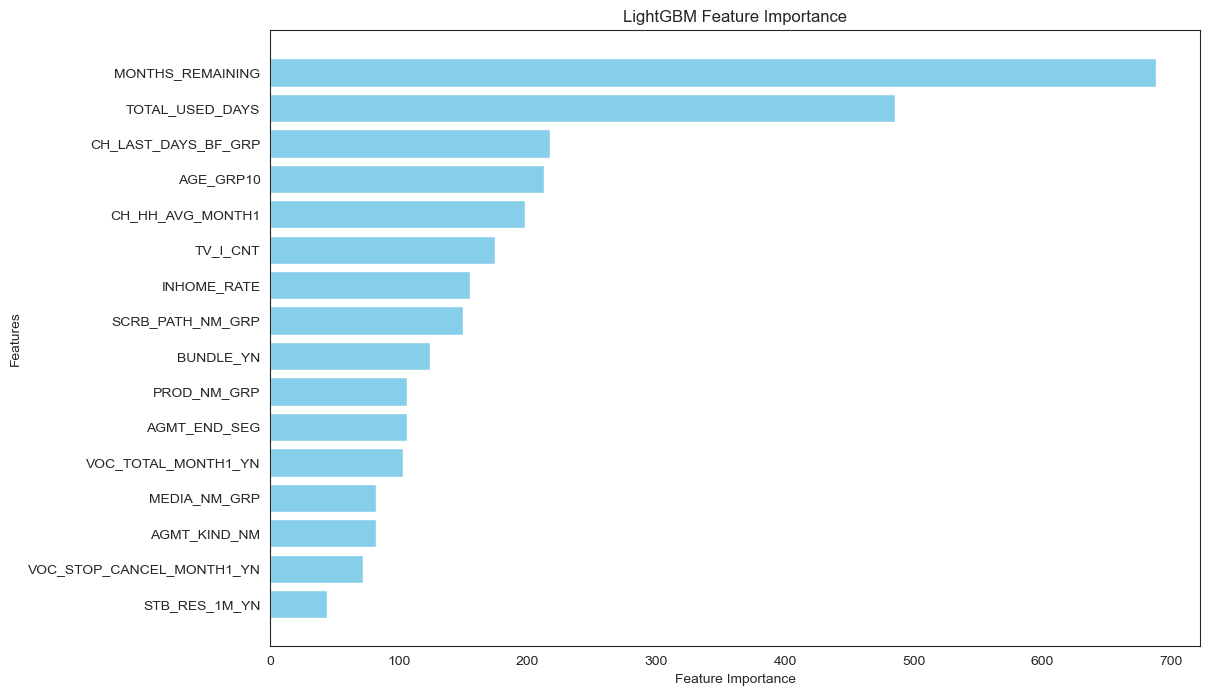

✅ Feature Importance
1. MONTHS_REMAINING
2. TOTAL_USED_DAYS
3. CH_LAST_DAYS_BF_GRP
4. AGE_GRP10
5. CH_HH_AVG_MONTH1
6. TV_I_CNT
7. INHOME_RATE
8. SCRB_PATH_NM_GRP
9. BUNDLE_YN
10. PROD_NM_GRP
11. AGMT_END_SEG
12. VOC_TOTAL_MONTH1_YN
13. MEDIA_NM_GRP
14. AGMT_KIND_NM
15. VOC_STOP_CANCEL_MONTH1_YN
16. STB_RES_1M_YN


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print("✅ Feature Importance")
for rank, feature in enumerate(feature_importance_df['Feature'], 1):
    print(f"{rank}. {feature}")

---

모델링 결과, <BR><BR>

**로지스틱 회귀 랜덤언더 FE** > 로지스틱 회귀 랜덤언더 FE 2   
**랜덤포레스트 랜덤언더 FE** > 랜덤포레스트 랜덤언더 FE 2   
XGB 랜덤언더 FE < **XGB 랜덤언더 FE 2**   
LGBM 랜덤언더 FE < **LGBM 랜덤언더 FE 2**    
**CAT 랜덤언더 FE** > CAT 랜덤언더 FE 2   
**로지스틱 회귀 가중치 FE** > 로지스틱 회귀 가중치 FE 2   
**LGBM 가중치 FE** > LGBM 가중치 FE 2   

해당 Feature들로 모델링을 했을 시, XGB, LGBM 랜덤 언더 샘플링 결과에서 좀 더 나은 성능을 보여준다.<br><br>
그리고 대략적으로 **CatBoost**와 **LightGBM**에서 제일 좋은 성능들을 보여준다.<br><br>

이제, 여러 모델들을 돌려봤을때, 상위 7개의 컬럼들만 남기고 돌려보겠다.